# Импортируем библиотеки

In [32]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mtd

In [2]:
data = pd.read_parquet('train_mfti.parquet')

In [3]:
df = data.copy()

* 1 show_vacancy - просмотр вакансии
* 2 preview_click_vacancy - клик по карточке вакансии
* 3 click_response - отклик со страницы вакансии
* 4 preview_click_response - отклик с карточки вакансии
* 5 click_favorite - добавление вакансии в избранное  со страницы вакансии
* 6 preview_click_favorite - добавление вакансии в избраное с карточки вакансии
* 7 click_contacts - клик на контакты со страницы вакансии
* 8 preview_click_contacts - клик на контакты из карточки вакансии
* 9 click_phone - клик на номер телефона, указанный в вакансии
* 10 preview_click_phone - клик на номер телефона из карточки вакансии

Жирным выделены искомые ""откликнется"" и ""позвонит"""

In [4]:

# Приведение столбцов event_date и event_timestamp к типу datetime
df['event_date'] = pd.to_datetime(df['event_date'])
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')

# Создание новых столбцов для каждого из признаков, содержащих информацию о дате и времени взаимодействия
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day
df['hour'] = df['event_timestamp'].dt.hour
df['minute'] = df['event_timestamp'].dt.minute

# Создание новых столбцов для каждого уникального значения вакансии и идентификатора пользователя
# df['vacancy_id_'] = df['vacancy_id_'].astype('category').cat.codes
# df['cookie_id'] = df['cookie_id'].astype('category').cat.codes
# df['user_id'] = df['user_id'].astype('category').cat.codes
# df['event_type'] = df['event_type'].astype('category').cat.codes
# Вывод преобразованной таблицы
display(df.head())

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,year,month,day,hour,minute
0,2022-08-01,2022-08-01 03:03:46,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy,2022,8,1,3,3
1,2022-08-01,2022-08-01 18:07:35,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,2022,8,1,18,7
2,2022-08-01,2022-08-01 17:58:15,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,2022,8,1,17,58
3,2022-08-01,2022-08-01 17:58:42,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,2022,8,1,17,58
4,2022-08-01,2022-08-01 17:28:49,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,2022,8,1,17,28


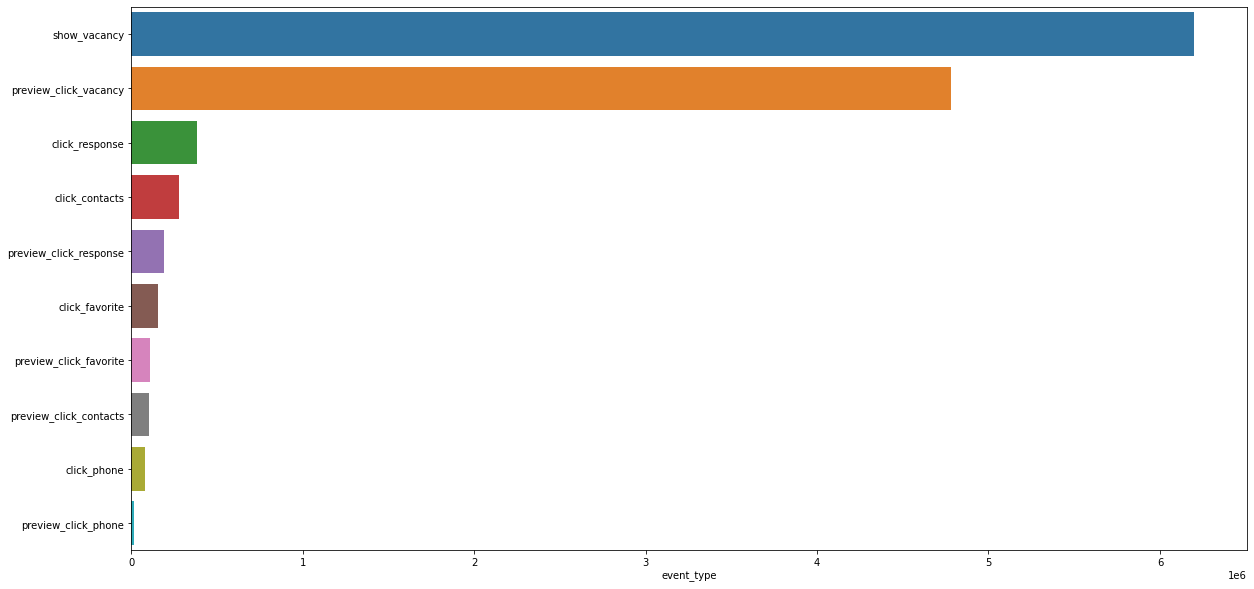

In [5]:
a=df.event_type.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(y=a.index, x=a)
plt.show()

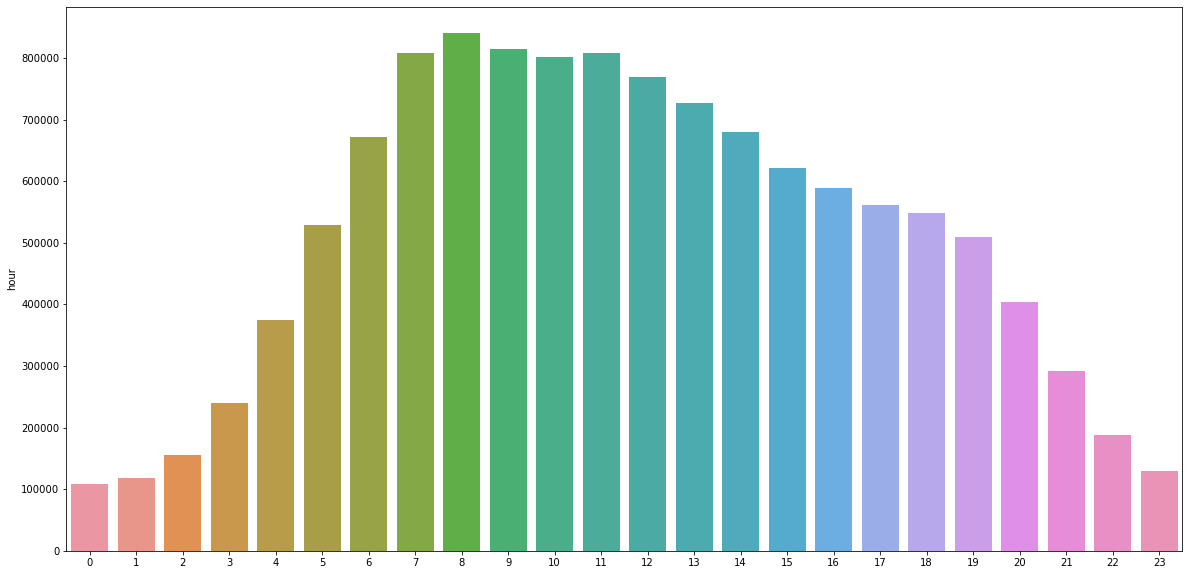

In [6]:
a=df.hour.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=a.index, y=a)
plt.show()

In [14]:
a=df.value_counts(['hour','event_type']).reset_index()
a.columns


Index(['hour', 'event_type', 0], dtype='object')

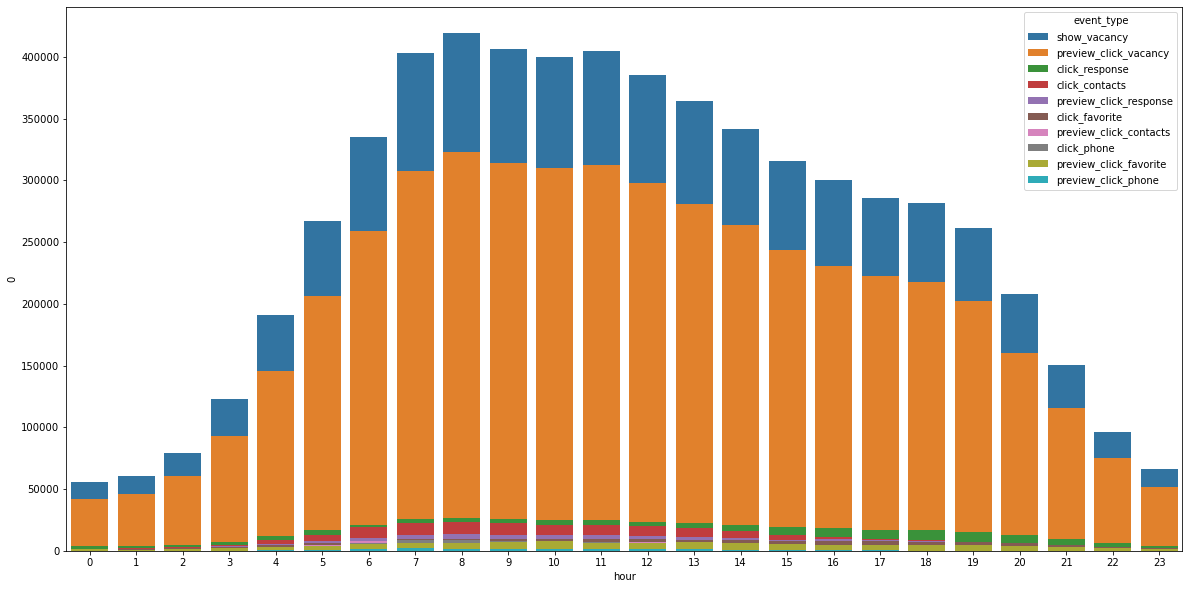

In [21]:
a=df.value_counts(['hour','event_type']).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(y=a[0], x=a.hour, hue=a.event_type, dodge=False)
plt.show()

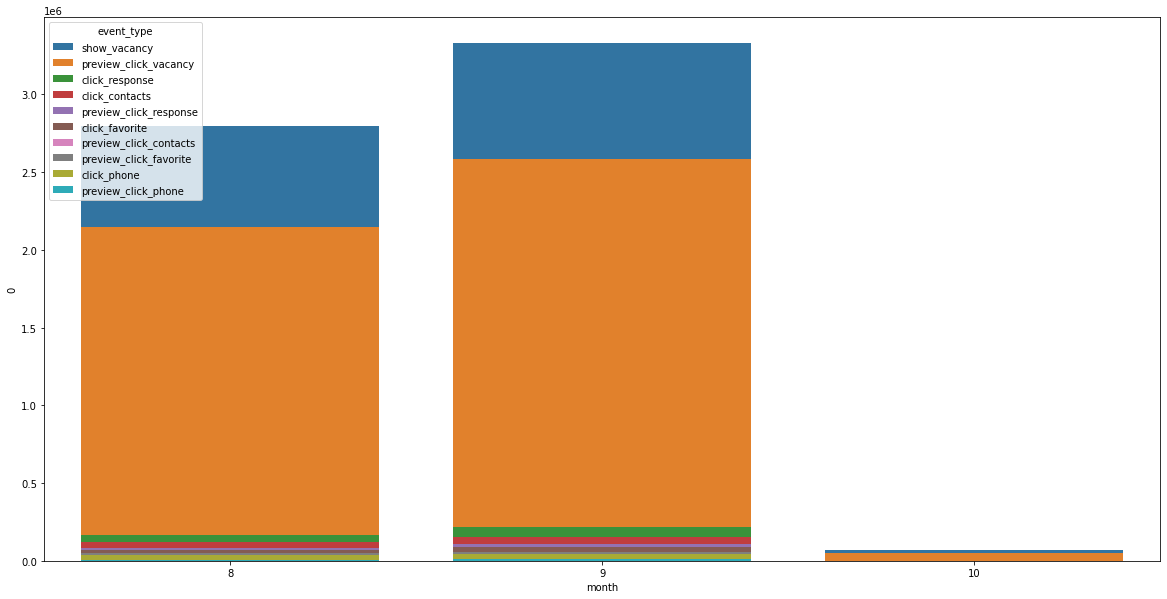

In [22]:
a=df.value_counts(['month','event_type']).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(y=a[0], x=a.month, hue=a.event_type, dodge=False)
plt.show()

# Оценить закрытость и открытость вакансий(макс и мин дату)

In [31]:
vac=pd.DataFrame()
vac['min_timestamp']=df.groupby(['vacancy_id_']).event_timestamp.min()
vac['max_timestamp']=df.groupby(['vacancy_id_']).event_timestamp.max()
vac['num_cookies']=gr=df.groupby('vacancy_id_').cookie_id.nunique()
vac['duration']=vac.max_timestamp-vac.min_timestamp
vac

,min_timestamp,max_timestamp,num_cookies,duration
vacancy_id_,,,,
100001,2022-08-02 00:29:50,2022-09-29 14:31:50,20,58 days 14:02:00
100002,2022-08-04 09:30:50,2022-10-01 12:02:19,224,58 days 02:31:29
100003,2022-08-04 14:52:02,2022-08-20 20:39:03,29,16 days 05:47:01
100004,2022-08-01 04:53:02,2022-08-13 22:09:41,3,12 days 17:16:39
100005,2022-09-12 14:03:40,2022-09-23 12:25:55,3,10 days 22:22:15
...,...,...,...,...
260163,2022-08-03 03:51:32,2022-09-24 08:50:52,9,52 days 04:59:20
260164,2022-08-01 23:55:35,2022-08-01 23:55:35,1,0 days 00:00:00
260165,2022-08-02 07:02:49,2022-09-24 19:11:10,42,53 days 12:08:21


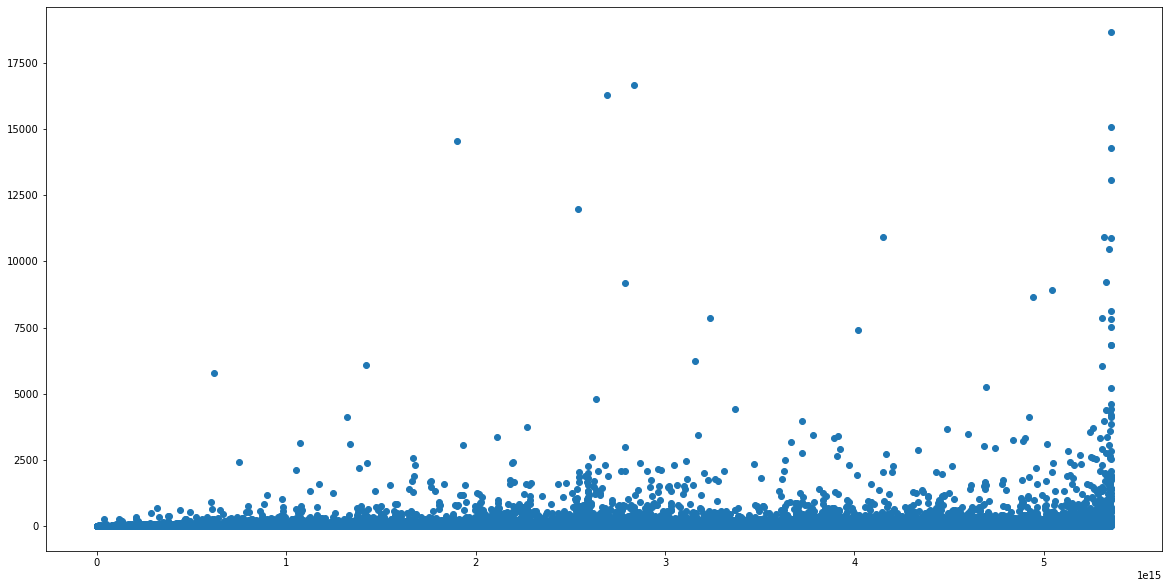

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(vac.duration,vac.num_cookies)
plt.xaxis.set_major_formatter(mtd.DateFormatter('%dd%h'))


# Чем дольше висит вакансия,тем больше ее смотрят,но вряд ли на нее откликнутся